# Summary Report part 2

Intended audience: data scientists

In [3]:
from scripts.supervised_model_utils import compare_best_with_baseline

## Modeling approaches

For these time-series forecasting business problem, two supervised algorithms will be considered:

- the Random Forest Regressor;

- the Multilayer Perceptron.

Both are available in Scikit-Learn. 

## Outer Gridsearch

First of all, the dataset had to be adjusted for a supervised problem, so the target variable was built using the sum of the revenue of the following 30 days.

Then, an outer gridsearch has been performed, to assess what pipeline of data transformation would lead to the best score (the average of MAE and RMSE); the tested steps were:

- **daily resampling of the dataset**, with nan-replacement techniques "linear", "forward fill" or "backward fill".

- **adding input variables** to account for the autoregressive component of the original variables: for each column (purchases, invoices, revenue, streams, views), the rolling mean, var, std and sum have been computed, using a variable days window. So here the search revolved around three variables:
    - the columns to be added;
    
    - the aggregating functions;
    
    - the n_days window.
   
- **scaling input variables**: either not scaling, or using a MinMaxScaler or a StandardScaler.

- **algorithm choice**: Random Forest Regressor or Multilayer Perceptron.

To facilitate this gridsearch, **three configurations** have been prepared (small, medium and large), that test an increasing number of combinations.

To visually inspect the performances of the model during gridsearching, a plotting option has been added, which plots the true vs pred performance on the test set if a better score is achieved.

N.B. The number of days in the future for which to predict revenue (30) has been treated as a variable, to facilitate future modifications.

## Inner Gridsearch

The two chosen algorithms' hyperparamters have been optimized through a gridsearch. In particular:

- Random Forest Regressor:
    ```python
        {
            'n_estimators': [50, 100, 200, 500],
            'criterion': ["mse", "mae"]
        }
```
- Multilayer Perceptron:
    ```python
        {
            'hidden_layer_sizes': [(30,), (30, 10), (50,)],
            'solver': ["lbfgs"],
            'alpha': [0.001, 0.0001],
            'max_iter': [5_000],
            'activation': ['relu', 'tanh']
        }
```

Due to time constraints, only the global model has been optimized. It is highly likely that country-specific models have different choices of best hyperparameters!

## Best Configuration Found

Outer Gridsearch:
```python
        {
            "algorithm": "random_forest", 
            "day_windows": [3, 5, 7], 
            "functions": ["mean"],
            "resampling_method": "linear", 
            "scaler": null, 
            "variables": ["revenue", "invoices"],
            "hm_days": 30, 
            "country": null, 
            "cv": 2  # for cross validation
        }
        
```
Inner Gridsearch of ```"algorithm": "random_forest"```:
```python
        {
            'n_estimators': 500,
            'criterion': "mse"
        }
```

## Comparison with Baseline Model on test set

The plot clearly shows that, except for a few isolated dates, the best model found performs considerably better than the baseline model, a simple linear regression.

| Model       | Test set score |
| ----------- | ----------- |
| Baseline      | 30403.45       |
| Best   | 8155.26        |

supervised_model_small_None_1.joblib


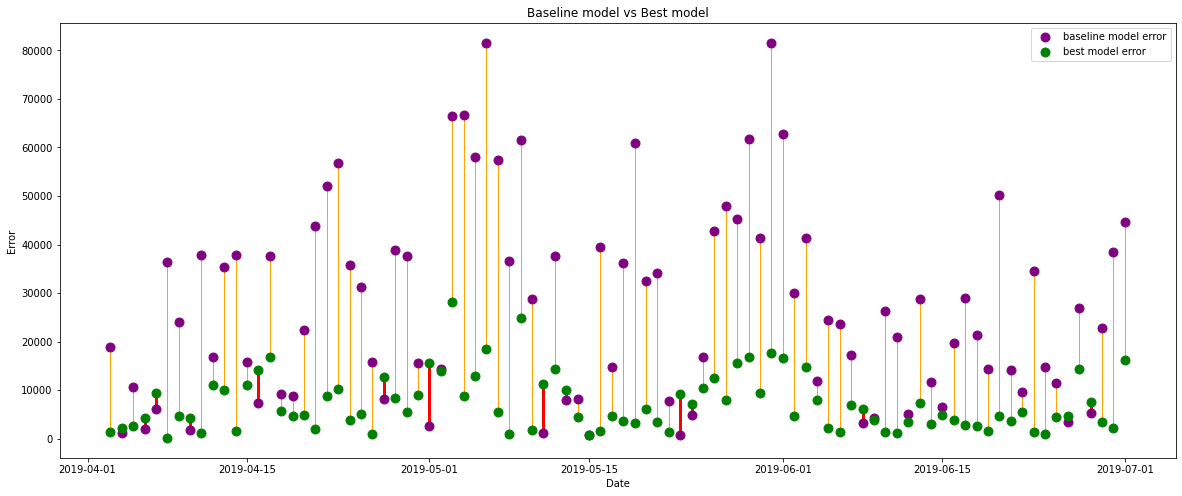

In [2]:
compare_best_with_baseline(country=None)